In [3]:
#Regression model that predicts the happiness of a populace
#based on their gdp per capita
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [4]:
# Load the data
oecd_bli = pd.read_csv(r"C:\Users\realm\OneDrive\Documents\Hands-On Machine Learning Projects\Chapter 1 Projects\oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(r"C:\Users\realm\OneDrive\Documents\Hands-On Machine Learning Projects\Chapter 1 Projects\gdp_per_capita.csv",thousands=',',delimiter='\t',
                                                encoding='latin1', na_values="n/a")

In [5]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [6]:
#Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

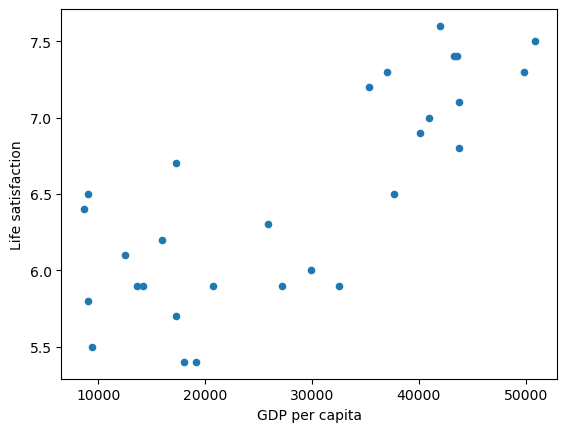

In [7]:
#Visualize the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [8]:
#Select a linear model
model = sklearn.linear_model.LinearRegression()

In [9]:
#Train the model
model.fit(X, y)

LinearRegression()

In [12]:
#Make a prediction for Cyprus
X_new = [[60678]]
print(model.predict(X_new))

[[7.73867768]]
